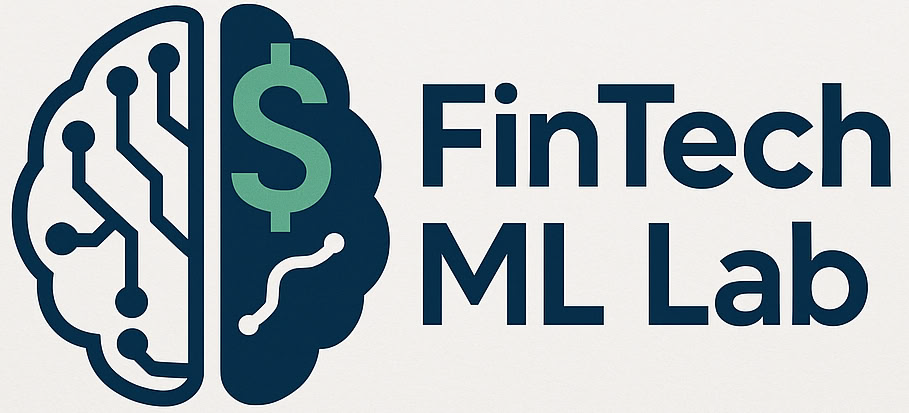

## Episode 3 – Fraud Detection with Isolation Forest

#### Detect Financial Fraud with Isolation Forest in Python | Unsupervised FinTech ML Tutorial

What is fraud detection in fintech?

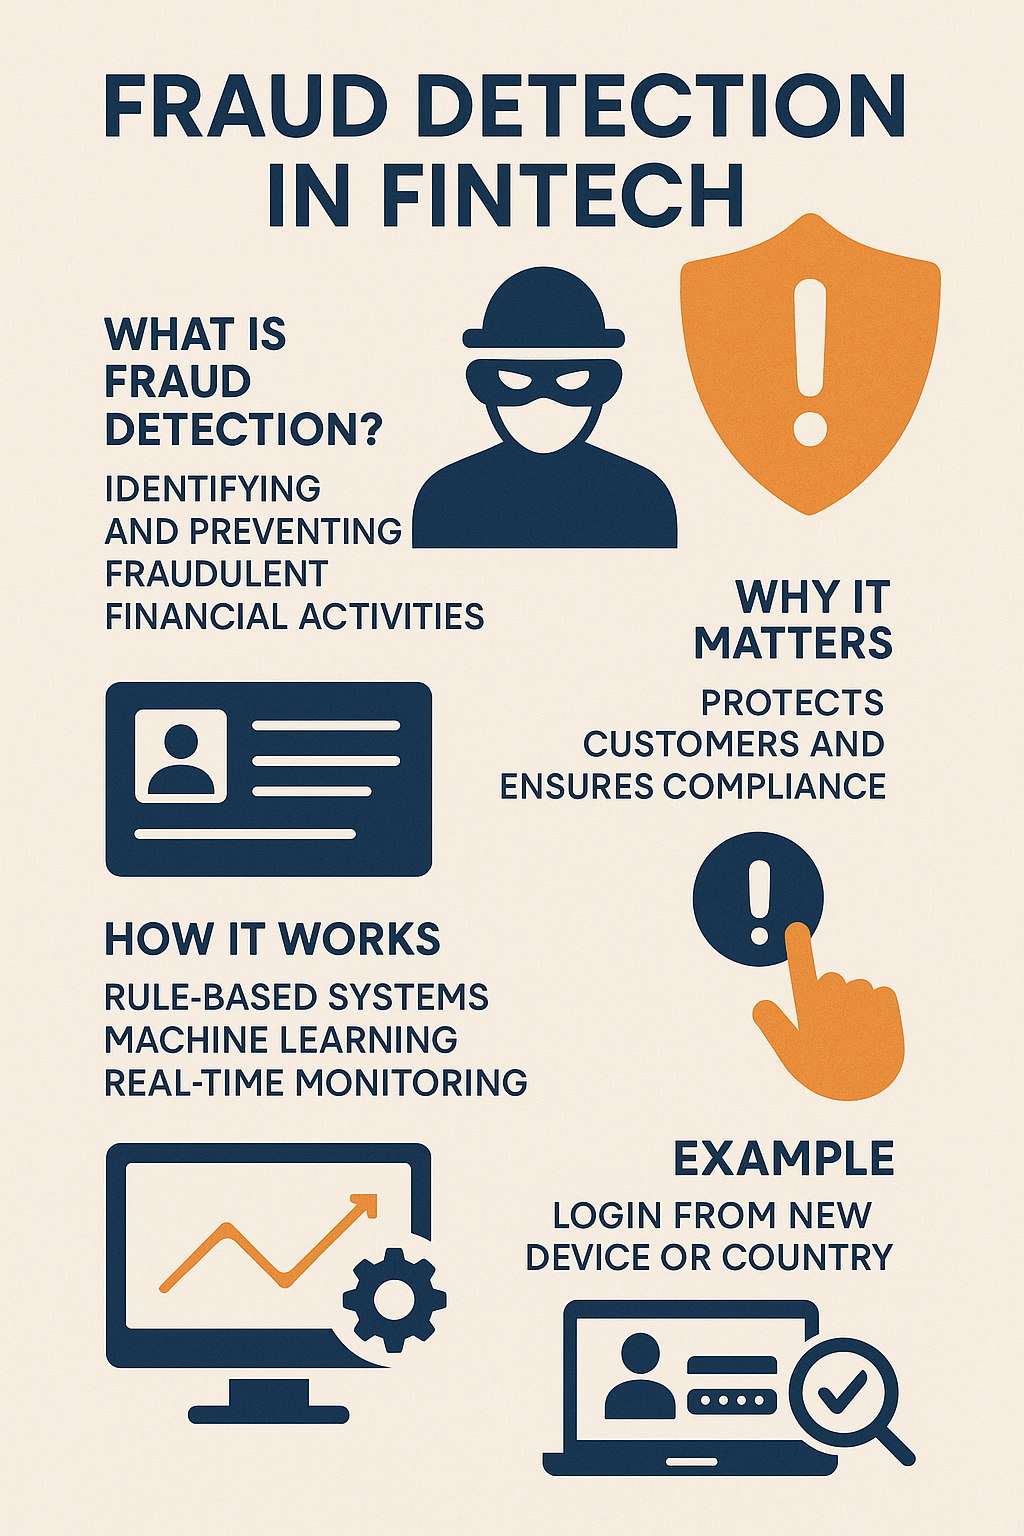

What is isolation forest algorithm?

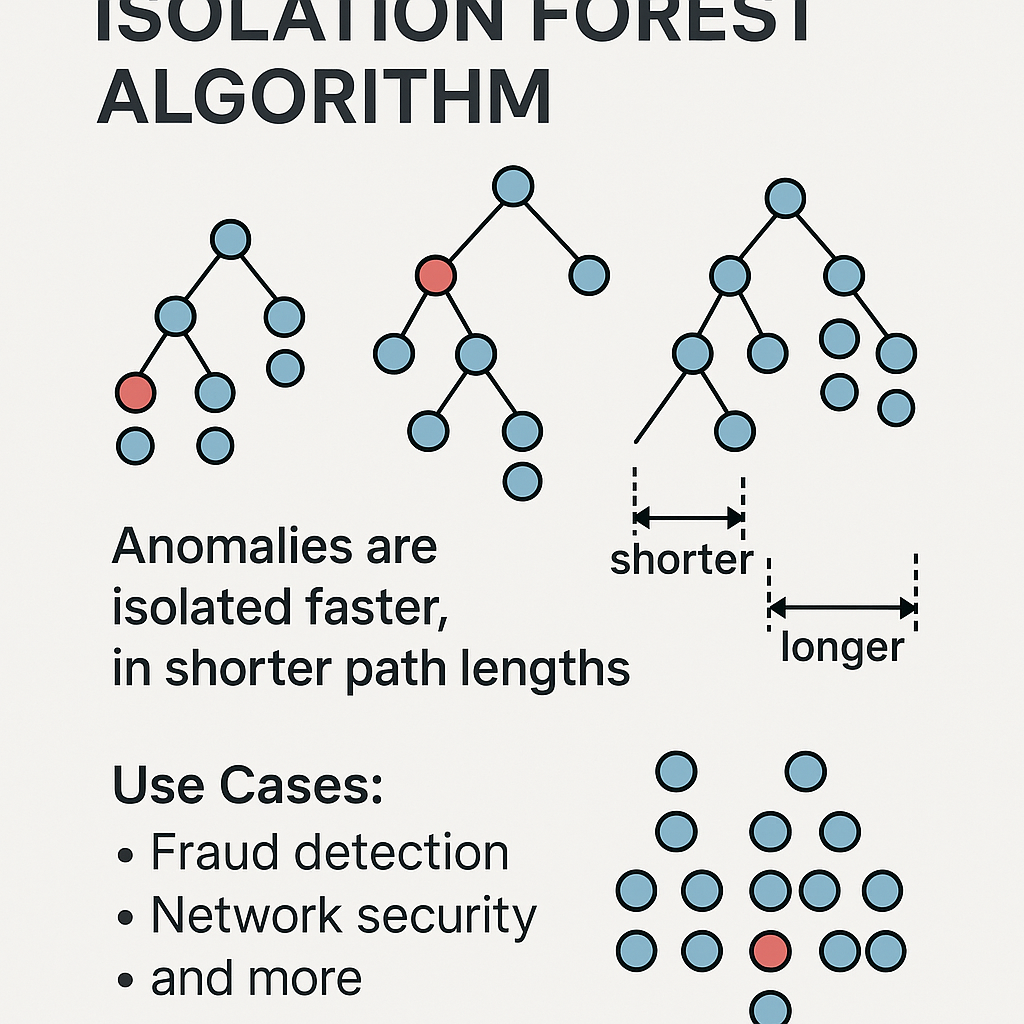

#### Let's get started

### Dataset Overview

Download the <a href="https://www.kaggle.com/competitions/ieee-fraud-detection/data">IEEE-CIS-FRAUD-DATASET</a> from kaggle and move it in your project directory manually.

#### Extract the dataset

You can also use a simplified version of the IEEE Fraud Dataset by downloading as following:

In [1]:
# To install gdown, uncomment below line and run the cell
#%pip install gdown

In [1]:
import gdown
# File ID from Google Drive share link
file_id = '1PaIZ1U2f6fDOvI75s52-xLQH5C9yNCxv'

url = f'https://drive.google.com/uc?id={file_id}'

output = '../data/ieee_fraud_data.parquet'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PaIZ1U2f6fDOvI75s52-xLQH5C9yNCxv
To: /home/noh/Desktop/AI Projects/fintech-ml-labs/data/ieee_fraud_data.parquet
100%|██████████| 49.9M/49.9M [01:32<00:00, 542kB/s] 


'../data/ieee_fraud_data.parquet'

### Step 0: Load the dataset

In [2]:
import pandas as pd

# Load the dataset

df = pd.read_parquet('../data/ieee_fraud_data.parquet', engine='fastparquet')

In [3]:
# Set maximum number of columns to display
pd.set_option("display.max_columns", 300)

# Explore the few rows
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2 P_emaildomain   C1  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0          None  1.0   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0     gmail.com  1.0   
2  490.0  150.0        visa  166.0   debit  330.0   87.0   outlook.com  1.0   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0     yahoo.com  2.0   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0     gmail.com  1.0   

    C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12   C13  C14     D1  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0   
1  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0   
3  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0   

     D4   D10    D15    M6  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  \
0   NaN  13.0    0.0     T  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
1   0.0   0.0    0.0     T  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
2   0.0   0.0  315.0     F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  94.0  84.0  111.0     F  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
4   NaN   NaN    NaN  None  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  \
0  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
1  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
3  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V67  V68  V69  V70  V71  V72  V73  V74  V75  V76  V77  V78  V79  V80  V81  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V82  V83  V84  V85  V86  V87  V88  V89  V90  V91  V92  V93  V94  V95   V96  \
0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0   
1  1.0  1.0  0.0  0.0  1.0  1

### Step 1: Understand the structure of the dataset

Let’s start by checking the shape of the dataset:

In [4]:
# Check the number of rows and columns
df.shape

(590528, 202)

Next, we examine the data types of each column:


In [8]:
# View column names and their data types
pd.set_option("display.max_rows", 1000)
df.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
P_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D4                float64
D10               float64
D15               float64
M6                 object
V12               float64
V13               float64
V14               float64
V15               float64
V16               float64
V17         

To get a quick overview of the data, including non-null counts, types, and memory usage, we can use:

In [5]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590528 entries, 0 to 590527
Columns: 202 entries, TransactionID to V321
dtypes: float32(193), int32(4), object(5)
memory usage: 466.3+ MB


### Step 3: Data Cleaning and Preprocessing

We will handle missing values, reduce memory usage, and convert data types. 

In [9]:
# Total number of rows
total_rows = df.shape[0]
total_rows

590528

In [14]:
def check_missing(df, dtype='object'):
    # Total number of rows
    total_rows = df.shape[0]

    # Check missing values and their percentage for specified dtype
    missing_ = df.select_dtypes(include=dtype).isnull().sum()
    missing_percent = (missing_ / total_rows) * 100

    # Combine into a DataFrame for better readability
    missing_summary = pd.DataFrame({
        'Missing Values': missing_,
        'Missing Percentage (%)': missing_percent.round(2)
    })

    # Filter out columns without missing values
    missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

    # Sort by missing percentage
    return missing_summary.sort_values(by='Missing Percentage (%)', ascending=False)
 


In [15]:
# For numeric types
check_missing(df, dtype=['float32', 'int32'])  

Missing Values  Missing Percentage (%)
V47           168957                   28.61
V44           168957                   28.61
V51           168957                   28.61
V50           168957                   28.61
V49           168957                   28.61
...              ...                     ...
V295              11                    0.00
V297              11                    0.00
V298              11                    0.00
V299              11                    0.00
V321              11                    0.00

[178 rows x 2 columns]

In [13]:
# For categorical
check_missing(df, dtype='object') 

Missing Values  Missing Percentage (%)
M6                     169348                   28.68
P_emaildomain           94454                   15.99
card4                    1577                    0.27
card6                    1571                    0.27

In [ ]:
import numpy as np

# Convert object columns to category and then to int32
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes.astype(np.int32)
